<a href="https://colab.research.google.com/github/LuisAngelOlveraOlvera/Grokking-Deep-Learning/blob/main/Chapter_11_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

onehots ={}
onehots['cat'] = np.array([1,0,0,0])
onehots['the'] = np.array([0,1,0,0])
onehots['dog'] = np.array([0,0,1,0])
onehots['sat'] = np.array([0,0,0,1])

sentence = ["the", "cat", "sat"]
x = onehots[sentence[0]] + onehots[sentence[1]] + onehots[sentence[2]]
print("Sent Encoding:" + str(x))

Sent Encoding:[1 1 0 1]


In [ ]:
import sys
import numpy as np

# Leer datos
with open('reviews.csv') as f:
    raw_reviews = f.readlines()

with open('labels.csv') as f:
    raw_labels = f.readlines()

# Tokenización y creación de vocabulario
tokens = list(map(lambda x: set(x.split(" ")), raw_reviews))
vocab = set()
for sent in tokens:
    for word in sent:
        if len(word) > 0:
            vocab.add(word)

vocab = list(vocab)

word2index = {word: i for i, word in enumerate(vocab)}

input_dataset = []
for sent in tokens:
    sent_indices = []
    for word in sent:
        try:
            sent_indices.append(word2index[word])
        except:
            pass
    input_dataset.append(list(set(sent_indices)))

target_dataset = []
for label in raw_labels:
    if label == 'positive\n':
        target_dataset.append(1)
    else:
        target_dataset.append(0)

In [ ]:
print(vocab[:10])
# Imprimir los primeros 10 elementos del diccionario word2index
first_10_items = list(word2index.items())[:10]
print(first_10_items)


['moron-commandos,', "Elegy'", 'incompleteness', 'clueless?', 'reÃ§ue', 'apprehension...why....he', 'surfer.', 'chivalrous,', 'juvenile-catching', 'Honor)']
[('moron-commandos,', 0), ("Elegy'", 1), ('incompleteness', 2), ('clueless?', 3), ('reÃ§ue', 4), ('apprehension...why....he', 5), ('surfer.', 6), ('chivalrous,', 7), ('juvenile-catching', 8), ('Honor)', 9)]


In [ ]:
print(input_dataset[0:10])

[[407541], [391682, 84998, 107526, 367118, 311822, 334864, 372754, 166423, 248855, 16412, 150047, 330271, 58401, 152611, 167460, 324132, 288810, 388650, 444972, 314930, 392243, 397874, 298040, 45625, 179260, 390720, 421952, 268869, 73799, 176712, 45640, 313415, 78407, 145484, 22088, 150094, 181841, 448086, 275542, 236121, 418908, 242269, 422493, 392300, 108144, 271473, 112243, 258677, 454774, 111223, 283770, 427648, 269955, 446086, 425096, 154767, 37010, 415379, 25236, 290454, 44186, 193690, 370332, 105122, 141474, 431266, 223910, 305319, 217256, 242856, 218794, 86705, 320198, 321224, 39627, 412875, 286927, 264407, 386777, 74461, 75486, 113375, 169695, 404191, 303335, 230633, 209642, 69866, 138476, 211696, 78581, 452854, 84217, 176379, 6396, 339198, 94977, 110856, 245001, 440587, 370957, 190734, 66320, 99603, 284437, 403221, 16150, 376601, 298269, 167198, 214813, 19230, 376616, 238891, 54571, 409903, 85808, 109369, 384313, 216380, 226111, 318787, 70980, 264005, 369480, 298314, 240459, 

In [ ]:
print(target_dataset[0:10])

[0, 1, 1, 1, 0, 1, 1, 1, 0, 0]


In [ ]:
np.random.seed(1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

alpha, iterations = (0.01, 2)
hidden_size = 100
weights_0_1 = 0.2 * np.random.random((len(vocab), hidden_size)) - 0.1
weights_1_2 = 0.2 * np.random.random((hidden_size, 1)) - 0.1

correct, total = (0, 0)

for iter in range(iterations):
    for i in range(len(input_dataset) - 1000):
        x, y = (input_dataset[i], target_dataset[i])
        layer_1 = sigmoid(np.sum(weights_0_1[x], axis=0))
        layer_2 = sigmoid(np.dot(layer_1, weights_1_2))
        layer_2_delta = layer_2 - y
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)
        weights_0_1[x] -= layer_1_delta * alpha
        weights_1_2 -= np.outer(layer_1, layer_2_delta) * alpha
        if np.abs(layer_2_delta) < 0.5:
            correct += 1
        total += 1
        if i % 10 == 9:
            progress = str(i / float(len(input_dataset)))
            sys.stdout.write('\rIter:' + str(iter) + ' Progress:' + progress[2:4] + '.' + progress[4:6] + '% Training Accuracy:' + str(correct / float(total)) + '%')
    print()

correct, total = (0, 0)
for i in range(len(input_dataset) - 1000, len(input_dataset)):
    x = input_dataset[i]
    y = target_dataset[i]
    layer_1 = sigmoid(np.sum(weights_0_1[x], axis=0))
    layer_2 = sigmoid(np.dot(layer_1, weights_1_2))
    if np.abs(layer_2 - y) < 0.5:
        correct += 1
    total += 1

print("Test Accuracy:" + str(correct / float(total)))

Iter:0 Progress:97.99% Training Accuracy:0.8398571428571429%
Iter:1 Progress:97.99% Training Accuracy:0.8732155794328629%
Test Accuracy:0.885


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Crear datos de muestra
sample_reviews = [
    "This movie was great! I loved it.",
    "Terrible film, waste of time.",
    "Average movie, nothing special.",
    "Excellent plot and acting.",
    "Boring and predictable."
]

sample_labels = [
    "positive",
    "negative",
    "neutral",
    "positive",
    "negative"
]

# Preprocesamiento
def preprocess_data(reviews, labels):
    tokens = [set(x.lower().split()) for x in reviews]
    vocab = set()
    for sent in tokens:
        vocab.update(sent)

    vocab = list(vocab)
    word2index = {word: i for i, word in enumerate(vocab)}

    input_dataset = []
    for sent in tokens:
        sent_indices = [word2index[word] for word in sent if word in word2index]
        input_dataset.append(list(set(sent_indices)))

    target_dataset = [1 if label.lower() == 'positive' else 0 for label in labels]

    return input_dataset, target_dataset, len(vocab)

# Crear matriz de características
def create_bow_matrix(input_dataset, vocab_size):
    matrix = np.zeros((len(input_dataset), vocab_size))
    for i, review in enumerate(input_dataset):
        matrix[i, review] = 1
    return matrix

# Cargar y preparar datos
input_dataset, target_dataset, vocab_size = preprocess_data(sample_reviews, sample_labels)
X = create_bow_matrix(input_dataset, vocab_size)
y = np.array(target_dataset)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(vocab_size,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=2, validation_split=0.2, verbose=1)

# Evaluar modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Hacer predicciones
predictions = model.predict(X_test)
print("Predicciones:", predictions)

Epoch 1/50
2/2 [==============================] - 1s 228ms/step - loss: 0.8122 - accuracy: 0.0000e+00 - val_loss: 0.5459 - val_accuracy: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 0.7755 - accuracy: 0.0000e+00 - val_loss: 0.5476 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 30ms/step - loss: 0.7478 - accuracy: 0.0000e+00 - val_loss: 0.5482 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 30ms/step - loss: 0.7186 - accuracy: 0.3333 - val_loss: 0.5505 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 31ms/step - loss: 0.6919 - accuracy: 0.3333 - val_loss: 0.5519 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.6686 - accuracy: 0.6667 - val_loss: 0.5525 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 30ms/step - loss: 0.6445 - accuracy: 1.0000 - val_loss: 0.5539 - val_accuracy: 1.0000
Epoch 8/50
2/2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Cargar datos
reviews = pd.read_csv("reviews.csv", header=None, names=["review"])
labels = pd.read_csv("labels.csv", header=None, names=["label"])

# Preprocesamiento
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(reviews["review"])

sequences = tokenizer.texts_to_sequences(reviews["review"])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

vocab_size = len(tokenizer.word_index) + 1

# Preparar etiquetas
labels = np.array([1 if label.lower() == 'positive' else 0 for label in labels["label"]])

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Crear modelo
embedding_dim = 16

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Hacer predicciones
predictions = model.predict(X_test)
print("Primeras 5 predicciones:", predictions[:5])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           1988176   
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1988465 (7.59 MB)
Trainable params: 1988465 (7.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1000/1000 [==============================] - 29s 28ms/step - loss: 0.48

In [ ]:
from typing import Iterator
import numpy as np
import sys

np.random.seed(1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Asumimos que vocab, input_dataset y target_dataset ya están definidos del código anterior

alpha, iterations = (0.01, 2)
hidden_size = 100

weights_0_1 = 0.2*np.random.random((vocab_size, hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size, 1)) - 0.1

correct, total = (0,0)
for iter in range(iterations):

    for i in range(len(padded_sequences)-1000):
        x, y = (padded_sequences[i], labels[i])
        layer_1 = sigmoid(np.sum(weights_0_1[x], axis=0))
        layer_2 = sigmoid(np.dot(layer_1, weights_1_2))

        layer_2_delta = layer_2 - y
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)

        weights_0_1[x] -= layer_1_delta * alpha
        weights_1_2 -= np.outer(layer_1, layer_2_delta)*alpha

        if(np.abs(layer_2_delta) < 0.5):
            correct += 1
        total += 1

        if(i % 10 == 9):
            progress = str(i/float(len(padded_sequences)))
            sys.stdout.write('\rIter:'+str(iter) +' Progress:'+progress[2:4] +'.'+progress[4:6] +'% Training Accuracy:' + str(correct/float(total)) + '%')
    print()
    correct, total = (0,0)
    for i in range(len(padded_sequences)-1000, len(padded_sequences)):
        x = padded_sequences[i]
        y = labels[i]
        layer_1 = sigmoid(np.sum(weights_0_1[x], axis=0))
        layer_2 = sigmoid(np.dot(layer_1, weights_1_2))
        if(np.abs(layer_2 - y) < 0.5):
            correct += 1
        total += 1
    print('Test Accuracy:' + str(correct/float(total)))

# Función para hacer predicciones
def predict(review):
    sequence = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    layer_1 = sigmoid(np.sum(weights_0_1[padded[0]], axis=0))
    layer_2 = sigmoid(np.dot(layer_1, weights_1_2))
    return layer_2[0]

# Ejemplo de uso
sample_review = "This movie was great! I loved it."
prediction = predict(sample_review)
print(f"Predicción para '{sample_review}': {prediction}")

Iter:0 Progress:97.99% Training Accuracy:0.802469387755102%
Test Accuracy:0.841
Iter:1 Progress:97.99% Training Accuracy:0.85556%
Test Accuracy:0.848
Predicción para 'This movie was great! I loved it.': 0.7786146618705676


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Cargar datos
reviews = pd.read_csv("reviews.csv", header=None, names=["review"])
labels = pd.read_csv("labels.csv", header=None, names=["label"])

# Preprocesamiento
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(reviews["review"])

sequences = tokenizer.texts_to_sequences(reviews["review"])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

vocab_size = len(tokenizer.word_index) + 1

# Preparar etiquetas
labels = np.array([1 if label.lower() == 'positive' else 0 for label in labels["label"]])

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Convertir a tensores
X_train = torch.tensor(X_train, dtype=torch.long)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Crear conjuntos de datos y cargadores de datos
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Definir el modelo
class SentimentAnalysisModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, max_len):
        super(SentimentAnalysisModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.global_avg_pool = nn.AvgPool1d(kernel_size=max_len)
        self.fc1 = nn.Linear(embedding_dim, 16)
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)
        x = self.global_avg_pool(x).squeeze()
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

embedding_dim = 16
model = SentimentAnalysisModel(vocab_size, embedding_dim, max_len)

# Definir el optimizador y la función de pérdida
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenar el modelo
num_epochs = 10
model.train()

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

# Evaluar el modelo
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs.squeeze() > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"Test accuracy: {test_accuracy:.4f}")

# Hacer predicciones
with torch.no_grad():
    predictions = model(X_test).squeeze()

print("Primeras 5 predicciones:", predictions[:5].numpy())

Epoch 1/10, Loss: 0.5876
Epoch 2/10, Loss: 0.3676
Epoch 3/10, Loss: 0.3085
Epoch 4/10, Loss: 0.2773
Epoch 5/10, Loss: 0.2560
Epoch 6/10, Loss: 0.2388
Epoch 7/10, Loss: 0.2254
Epoch 8/10, Loss: 0.2143
Epoch 9/10, Loss: 0.2042
Epoch 10/10, Loss: 0.1959
Test accuracy: 0.8756
Primeras 5 predicciones: [0.99550134 0.7513859  0.9188563  0.95233613 0.9143394 ]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# generar datos de ejemplo
np.random.seed(1)
n_samples = 100
X = np.random.rand(n_samples, 2) * 2 -1 # 100 puntos en un rango de [-1, 1]
y = (X[:, 0] * X[:, 1] > 0).astype(int)  # Clase A si x*y > 0, sino Clase B

print("El valor de x es: ",X)
print("El valor de y es: ",y)

El valor de x es:  [[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]
 [-0.70648822 -0.81532281]
 [-0.62747958 -0.30887855]
 [-0.20646505  0.07763347]
 [-0.16161097  0.370439  ]
 [-0.5910955   0.75623487]
 [-0.94522481  0.34093502]
 [-0.1653904   0.11737966]
 [-0.71922612 -0.60379702]
 [ 0.60148914  0.93652315]
 [-0.37315164  0.38464523]
 [ 0.7527783   0.78921333]
 [-0.82991158 -0.92189043]
 [-0.66033916  0.75628501]
 [-0.80330633 -0.15778475]
 [ 0.91577906  0.06633057]
 [ 0.38375423 -0.36896874]
 [ 0.37300186  0.66925134]
 [-0.96342345  0.50028863]
 [ 0.97772218  0.49633131]
 [-0.43911202  0.57855866]
 [-0.79354799 -0.10421295]
 [ 0.81719101 -0.4127717 ]
 [-0.42444932 -0.73994286]
 [-0.96126608  0.35767107]
 [-0.57674377 -0.46890668]
 [-0.01685368 -0.89327491]
 [ 0.14823521 -0.70654285]
 [ 0.17861107  0.39951672]
 [-0.79533114 -0.17188802]
 [ 0.38880032 -0.17164146]
 [-0.90009308  0.07179281]
 [ 0.32758929  0.02977822]
 [ 0.88918951  0.17311008]
 [ 0.80680383 -0.72505059]
 [-0.7214

In [ ]:
# Convertir a tensores
X = torch.tensor(X, dtype= torch.float32)
y = torch.tensor(y, dtype= torch.float32).reshape(-1, 1)
print("El valor de X en tensor es: ", X)
print("El valor de y en tensor es: ", y)

El valor de X en tensor es:  tensor([[-0.1660,  0.4406],
        [-0.9998, -0.3953],
        [-0.7065, -0.8153],
        [-0.6275, -0.3089],
        [-0.2065,  0.0776],
        [-0.1616,  0.3704],
        [-0.5911,  0.7562],
        [-0.9452,  0.3409],
        [-0.1654,  0.1174],
        [-0.7192, -0.6038],
        [ 0.6015,  0.9365],
        [-0.3732,  0.3846],
        [ 0.7528,  0.7892],
        [-0.8299, -0.9219],
        [-0.6603,  0.7563],
        [-0.8033, -0.1578],
        [ 0.9158,  0.0663],
        [ 0.3838, -0.3690],
        [ 0.3730,  0.6693],
        [-0.9634,  0.5003],
        [ 0.9777,  0.4963],
        [-0.4391,  0.5786],
        [-0.7935, -0.1042],
        [ 0.8172, -0.4128],
        [-0.4244, -0.7399],
        [-0.9613,  0.3577],
        [-0.5767, -0.4689],
        [-0.0169, -0.8933],
        [ 0.1482, -0.7065],
        [ 0.1786,  0.3995],
        [-0.7953, -0.1719],
        [ 0.3888, -0.1716],
        [-0.9001,  0.0718],
        [ 0.3276,  0.0298],
        [ 0.8892,  

In [ ]:
# Definir modelo
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    self.hidden = nn.Linear(2,3) # capa oculta con 3 neuronas
    self.output = nn.Linear(3,1) # Capa de salida con 1 neurona
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = torch.relu(self.hidden(x))
    x = self.sigmoid(self.output(x))
    return x

# crear modelo
model= SimpleNN()
model

SimpleNN(
  (hidden): Linear(in_features=2, out_features=3, bias=True)
  (output): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
# Definir el optimizador y la función de pérdida
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Epoch [100/1000], Loss: 0.7117
Epoch [200/1000], Loss: 0.7117
Epoch [300/1000], Loss: 0.7117
Epoch [400/1000], Loss: 0.7117
Epoch [500/1000], Loss: 0.7117
Epoch [600/1000], Loss: 0.7117
Epoch [700/1000], Loss: 0.7117
Epoch [800/1000], Loss: 0.7117
Epoch [900/1000], Loss: 0.7117
Epoch [1000/1000], Loss: 0.7117


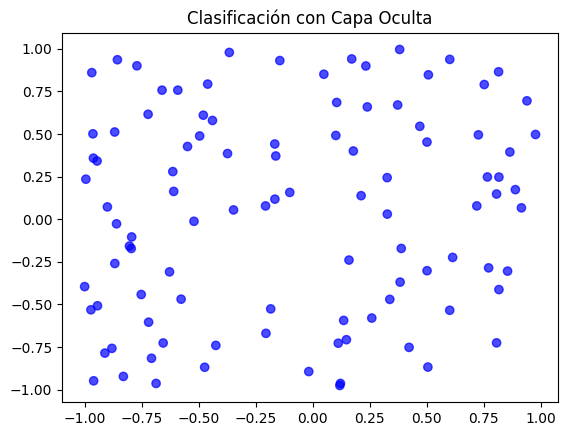

In [ ]:
# Entrenar el modelo
num_epochs = 1000
for epoch in range(num_epochs):
  optimizer.zero_grad()
  outputs = model(X)
  loss = criterion(outputs, y)
  loss.backward()
  optimizer.step

  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Visualizar los resultados
with torch.no_grad():
  y_pred = model(X).numpy()
  y_pred = (y_pred > 0.5).astype(int).flatten()

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='bwr', alpha=0.7)
plt.title('Clasificación con Capa Oculta')
plt.show()

Epoch [100/1000], Loss: 0.6890
Epoch [200/1000], Loss: 0.6888
Epoch [300/1000], Loss: 0.6887
Epoch [400/1000], Loss: 0.6886
Epoch [500/1000], Loss: 0.6886
Epoch [600/1000], Loss: 0.6886
Epoch [700/1000], Loss: 0.6886
Epoch [800/1000], Loss: 0.6886
Epoch [900/1000], Loss: 0.6886
Epoch [1000/1000], Loss: 0.6886


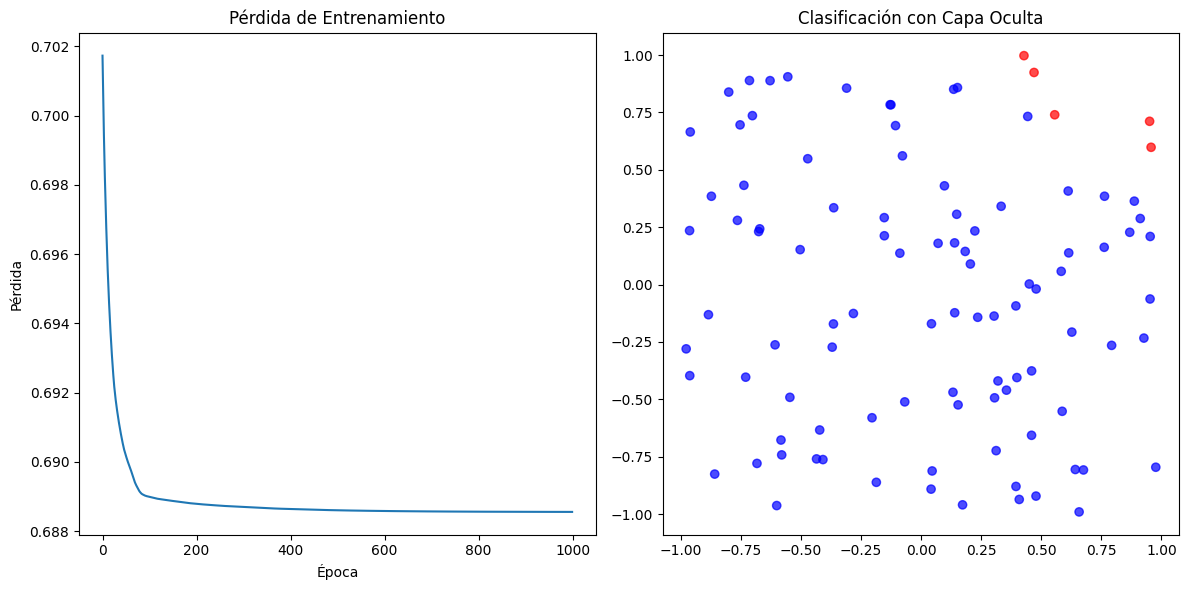

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 2) * 2 - 1  # 100 puntos en un rango de [-1, 1]
y = (X[:, 0] * X[:, 1] > 0).astype(int)  # Clase A si x*y > 0, sino Clase B

# Convertir a tensores
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(2, 3)  # Capa oculta con 3 neuronas
        self.output = nn.Linear(3, 1)  # Capa de salida con 1 neurona
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# Crear el modelo
model = SimpleNN()

# Definir el optimizador y la función de pérdida
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Entrenar el modelo
num_epochs = 1000
losses = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Visualizar los resultados
with torch.no_grad():
    y_pred = model(X).numpy()
    y_pred = (y_pred > 0.5).astype(int).flatten()

plt.figure(figsize=(12, 6))

# Gráfica de la pérdida de entrenamiento
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Pérdida de Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')

# Visualización de la clasificación
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='bwr', alpha=0.7)
plt.title('Clasificación con Capa Oculta')

plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter
import math

def similar(target='beautiful'):
    target_index = word2index.get(target)
    if target_index is None:
        raise ValueError(f"Target word '{target}' not found in word2index.")

    if target_index >= len(weights_0_1):
        raise ValueError(f"Target index {target_index} is out of bounds for weights_0_1 with size {len(weights_0_1)}.")

    scores = Counter()
    for word, index in word2index.items():
        if index >= len(weights_0_1):
            print(f"Warning: Index {index} for word '{word}' is out of bounds, skipping.")
            continue

        raw_difference = weights_0_1[index] - weights_0_1[target_index]
        squared_difference = raw_difference * raw_difference
        scores[word] = -math.sqrt(sum(squared_difference))

    return scores.most_common(10)

print(similar('beautiful'))


Se han truncado las últimas 5000 líneas del flujo de salida.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out of bounds, skipping.
' is out 

In [ ]:
import sys
import random
import math
from collections import Counter
import numpy as np

np.random.seed(1)
random.seed(1)

# Read and preprocess data
f = open('reviews.csv')
raw_reviews = f.readlines()
f.close()

tokens = list(map(lambda x: x.split(" "), raw_reviews))
wordcnt = Counter()

# Build vocabulary
for sent in tokens:
    for word in sent:
        wordcnt[word] -= 1

vocab = list(set(map(lambda x: x[0], wordcnt.most_common())))
word2index = {}
for i, word in enumerate(vocab):
    word2index[word] = i

# Verification step
assert max(word2index.values()) < len(vocab), "Índice de palabra fuera de rango"

# Prepare input dataset
input_dataset = []
concatenated = []
for sent in tokens:
    sent_indices = []
    for word in sent:
        try:
            sent_indices.append(word2index[word])
            concatenated.append(word2index[word])
        except:
            pass
    input_dataset.append(sent_indices)

concatenated = np.array(concatenated)
random.shuffle(input_dataset)

# MODEL PARAMETERS
alpha, iterations = (0.01, 2)
hidden_size, window, negative = (50, 2, 5)
weights_0_1 = (np.random.rand(len(vocab), hidden_size) - 0.5) * 0.2
weights_1_2 = np.random.rand(len(vocab), hidden_size) * 0  # Corrected
layer_2_target = np.zeros(negative + 1)
layer_2_target[0] = 1

# Function to find similar words
def similar(target='beautiful'):
    target_index = word2index[target]
    scores = Counter()
    for word, index in word2index.items():
        raw_difference = weights_0_1[index] - weights_0_1[target_index]
        squared_difference = raw_difference * raw_difference
        scores[word] = -math.sqrt(sum(squared_difference))
    return scores.most_common(10)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Training loop
for rev_i, review in enumerate(input_dataset * iterations):
    for target_i in range(len(review)):
        target_samples = [review[target_i]] + list(concatenated[
            (np.random.rand(negative) * min(len(concatenated), len(vocab))).astype('int').tolist()
        ])

        # Verification step
        assert all(0 <= ts < len(vocab) for ts in target_samples), f"Índice inválido en target_samples: {target_samples}"

        left_context = review[max(0, target_i - window): target_i]
        right_context = review[target_i + 1: min(len(review), target_i + window)]
        layer_1 = np.mean(weights_0_1[left_context + right_context], axis=0)
        layer_2 = sigmoid(layer_1.dot(weights_1_2[target_samples].T))
        layer_2_delta = layer_2 - layer_2_target
        layer_1_delta = layer_2_delta.dot(weights_1_2[target_samples])
        weights_0_1[left_context + right_context] -= layer_1_delta * alpha
        weights_1_2[target_samples] -= np.outer(layer_2_delta, layer_1) * alpha

        if rev_i % 250 == 0:
            sys.stdout.write('\rProgress: ' + str(rev_i / float(len(input_dataset) * iterations)) + " " + str(similar('terrible')))
            sys.stdout.flush()

    sys.stdout.write('\rProgress: ' + str(rev_i / float(len(input_dataset) * iterations)))
    sys.stdout.flush()

print(similar('terrible'))

Progress: 0.02749945001099978 [('terrible', -0.0), ('writing', -0.4686960605157112), ('kid', -0.5084200592995828), ('perfect', -0.5182709405965188), ('novel', -0.5349763921409996), ('musical', -0.5417531894678919), ('remains', -0.5423493275532779), ('father', -0.5442206681433633), ('monster', -0.5502448085492879), ('documentary', -0.5507742360457502)]